In [2]:
import os
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
#binary ise BernoilliNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline


from wordcloud import WordCloud
from PIL import Image

import matplotlib.pyplot as plt


In [ ]:
#json dosyası: JSON (JavaScript Object Notation – JavaScript Nesne Notasyonu) insanlar için okunabilir olan bilgi saklama ve alışveriş formatıdır. Bir JSON dosyası sadece metin kapsar ve .json uzantısını kullanır.

In [ ]:
##unix time: unix sistemlerde sistem tarihinin formatina verlen isim.. "unix time" 1/1/1970 00:00 tarihinden itibaren gecen saniye sayisina denk düşen bir integer'dir..

In [3]:
dataset = "Electronics_5.json" #veri bu json dosyasının içerisinde mi değil mi diye kotrol ederek sistemden çekiyoruz.

if os.path.isfile(dataset):
    df = pd.read_json("Electronics_5.json", lines=True)
else:
    url = r"http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Electronics_5.json.gz"
    df = pd.read_json(url, compression='gzip', lines=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1689188 entries, 0 to 1689187
Data columns (total 9 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   reviewerID      1689188 non-null  object
 1   asin            1689188 non-null  object
 2   reviewerName    1664458 non-null  object
 3   helpful         1689188 non-null  object
 4   reviewText      1689188 non-null  object
 5   overall         1689188 non-null  int64 
 6   summary         1689188 non-null  object
 7   unixReviewTime  1689188 non-null  int64 
 8   reviewTime      1689188 non-null  object
dtypes: int64(2), object(7)
memory usage: 116.0+ MB


In [8]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5,Gotta have GPS!,1370131200,"06 2, 2013"
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1,Very Disappointed,1290643200,"11 25, 2010"
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3,1st impression,1283990400,"09 9, 2010"
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2,"Great grafics, POOR GPS",1290556800,"11 24, 2010"
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1,"Major issues, only excuses for support",1317254400,"09 29, 2011"


In [4]:
df.to_csv("amazonreview.csv") # json formatındaki veriyi csv ye çevirip amazonreview.csv adı ile isimlendiriyoruz

In [5]:
df.isnull().sum()

reviewerID            0
asin                  0
reviewerName      24730
helpful               0
reviewText            0
overall               0
summary               0
unixReviewTime        0
reviewTime            0
dtype: int64

In [6]:
df1=pd.read_csv("amazonreview.csv", usecols=[ "reviewText","overall"])

In [8]:
df1['reviewText']=df1['reviewText'].apply(str)# amazonreview in iki sütununu aldığım koddan sonra reviewtext sütununda boş veriler oluştu bunu düzeltmek için bu kodu çalıştırdım.

In [10]:
df1.isnull().sum()

reviewText    0
overall       0
dtype: int64

In [ ]:
from google.colab import files
files.download("amazonreview.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Yeni Bölüm

In [17]:
df1

,reviewText,overall
0,We got this GPS for my husband who is an (OTR)...,5
1,"I'm a professional OTR truck driver, and I bou...",1
2,"Well, what can I say. I've had this unit in m...",3
3,"Not going to write a long review, even thought...",2
4,I've had mine for a year and here's what we go...,1
...,...,...
1689183,Burned these in before listening to them for a...,5
1689184,Some people like DJ style headphones or earbud...,5
1689185,I&#8217;m a big fan of the Brainwavz S1 (actua...,5
1689186,"I've used theBrainwavz S1 In Ear Headphones, a...",5


In [ ]:
df1.overall.value_counts()

5    1009026
4     347041
3     142257
1     108725
2      82139
Name: overall, dtype: int64

In [ ]:
import seaborn as sns

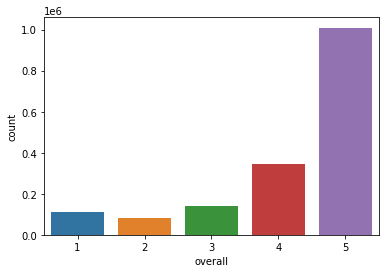

In [ ]:
sns.countplot(data=df1, x='overall');

In [11]:
df1['reviewText']=df1['reviewText'].str.lower()
df1['reviewText']=df1['reviewText'].str.replace('[^\w\s]','')
df1['reviewText']=df1['reviewText'].str.replace('\d+','')
df1['reviewText']=df1['reviewText'].str.replace('\n',' ').replace('\r','')



In [ ]:
pattern = r"\&\#[0-9]+\;"
df1["reviewText"] = df1["reviewText"].str.replace(pat=pattern, repl="", regex=True)
#düzenleme yapıyoruz

In [ ]:
import html

In [12]:
import re
import nltk

from nltk import word_tokenize, pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from nltk.corpus import wordnet



In [ ]:
#for i in range(0,len(df1)-1):
    #if type(df1.iloc[i]['reviewText']) != str:
       # df1.iloc[i]['reviewText'] = str(df1.iloc[i]['reviewText'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#!pip install langdetect

In [ ]:
#from langdetect import detect

In [ ]:
#for index, row in df1['reviewText'].iteritems():
    #lang = detect(row) #detecting each row
    #df1.loc[index, 'Language'] = lang
#df1.sample()

In [ ]:
df1.isnull().sum()

reviewText    0
overall       0
dtype: int64

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def woc(data,bgcolor):
    plt.figure(figsize=(10,10))
    wc=WordCloud(background_color=bgcolor,max_words=100).generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

In [ ]:
puan1=df1.query("overall=='1'")['reviewText']
puan2=df1.query("overall=='2'")['reviewText']
puan3=df1.query("overall=='3'")['reviewText']
puan4=df1.query("overall=='4'")['reviewText']
puan5=df1.query("overall=='5'")['reviewText']


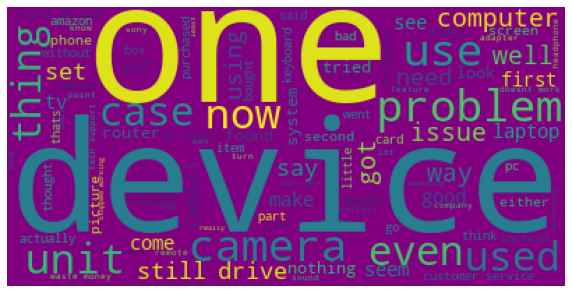

In [ ]:
woc(puan1,'purple')

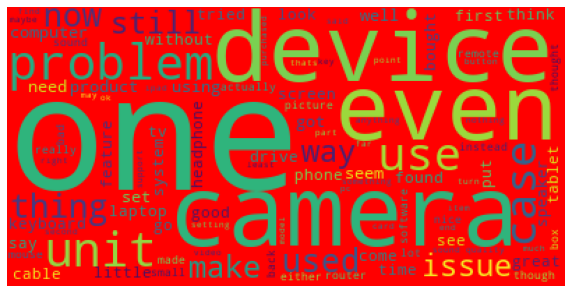

In [ ]:
woc(puan2,'red')

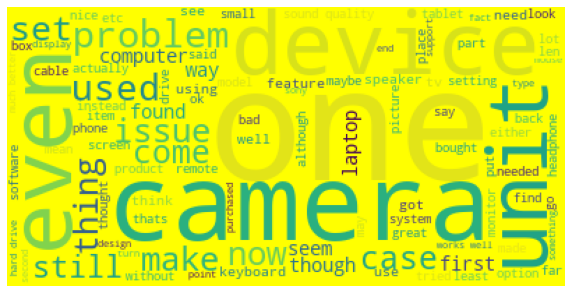

In [ ]:
woc(puan3,'yellow')

In [ ]:
woc(puan4,'blue')# oturum çöküyor çalıştıramıyorum.

In [ ]:
woc(puan5,'green')# oturum çöküyor çalıştıramıyorum.

In [22]:
df1.overall.value_counts()

5    1009026
4     347041
3     142257
1     108725
2      82139
Name: overall, dtype: int64

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#df1['reviewText']=df1['reviewText'].str.replace('[^a-zA-Z]',' ')


In [13]:
df1.sample(10)

,reviewText,overall
1197746,this works very well with my ear bud bluetooth...,5
933722,this seller was super and ive ordered differe...,5
1546262,this charger works great and fast you have to ...,5
659317,this is by far the best wall mount you can buy...,5
1634123,im using this tb ssd drive on a self built vmw...,5
1593608,like the easy setup feel like the ipad is well...,4
832486,i own two other more expensive combos like thi...,5
1365375,im returning these headphones because they wou...,1
1053809,good tactile grip feels good in the hand sta...,5
1098390,i got this set of cables to use with my iphon...,4


In [14]:
from sklearn.model_selection import train_test_split


In [15]:
x_train,x_test,y_train,y_test=train_test_split(df["reviewText"],df["overall"],random_state=42)

In [16]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [17]:
vect=CountVectorizer(lowercase=True,stop_words="english")
x_train_dtm=vect.fit_transform(x_train)
print(x_train_dtm)
x_test_dtm=vect.transform(x_test)

  (0, 188127)	1
  (0, 203321)	1
  (0, 137324)	1
  (0, 2915)	1
  (0, 304140)	1
  (0, 223580)	1
  (0, 93375)	1
  (0, 422504)	1
  (0, 117993)	1
  (0, 171817)	1
  (0, 144551)	1
  (0, 374195)	1
  (0, 290153)	1
  (0, 232789)	2
  (0, 259714)	1
  (0, 137301)	1
  (0, 238936)	1
  (0, 107307)	1
  (0, 348247)	1
  (0, 194128)	1
  (0, 174731)	1
  (0, 239865)	1
  (0, 165240)	1
  (1, 93375)	1
  (1, 322546)	1
  :	:
  (1266890, 351963)	1
  (1266890, 184947)	1
  (1266890, 346607)	1
  (1266890, 331789)	3
  (1266890, 195800)	1
  (1266890, 203026)	1
  (1266890, 281806)	1
  (1266890, 353828)	2
  (1266890, 132154)	1
  (1266890, 69151)	1
  (1266890, 176517)	1
  (1266890, 163699)	1
  (1266890, 342717)	1
  (1266890, 246887)	1
  (1266890, 306290)	1
  (1266890, 161403)	1
  (1266890, 59325)	1
  (1266890, 199356)	1
  (1266890, 157164)	1
  (1266890, 135908)	1
  (1266890, 291000)	2
  (1266890, 363155)	1
  (1266890, 127271)	1
  (1266890, 331617)	2
  (1266890, 83627)	1


In [ ]:
tf=pd.DataFrame(x_train_dtm.toarray(),columns=vect.get_feature_names())
tf.head() # ram den dolayı oturum çötü

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [ ]:
nb=MultinomialNB()
nb.fit(x_train_dtm,y_train)
y_pred_class=nb.predict(x_test_dtm)

In [ ]:
metrics.accuracy_score(y_test,y_pred_class)

# Yeni Bölüm

# Yeni Bölüm